In [27]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

#### 1. Загрузить файл auto.csv

In [2]:
import pandas as pd
data = pd.read_csv('auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

#### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [5]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


In [53]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14,6


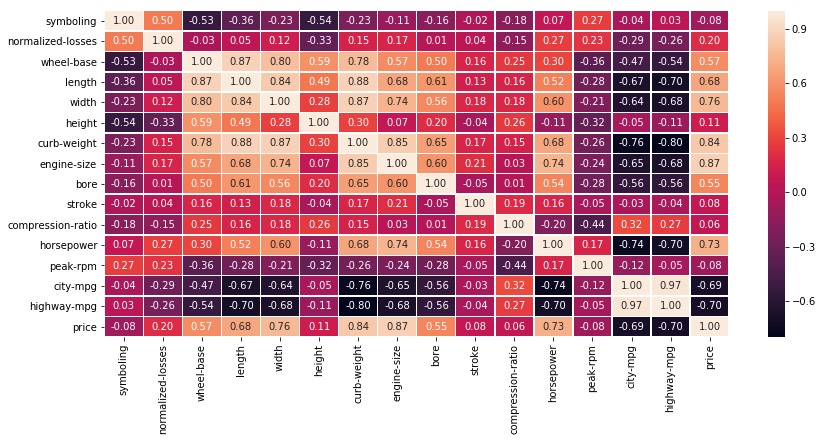

In [54]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, fmt=".2f", 
            linewidths=0.5)

#### 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

(array([1.00510910e-04, 5.44938670e-05, 4.23841188e-05, 2.05865720e-05,
        8.47682376e-06, 3.63292447e-06, 4.84389929e-06, 9.68779858e-06,
        2.42194965e-06, 1.21097482e-06]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

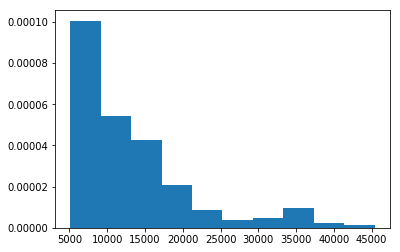

In [21]:
from matplotlib import pyplot as plt

priced = data['price']
plt.hist(priced, bins=10, density=True)

In [39]:
skewness = stats.skew(priced)

print("skewness: ", skewness)

skewness:  1.7534486514523662


In [40]:
kurtosis = stats.kurtosis(priced)

print("kurtosis: ", kurtosis)

kurtosis:  2.848082544390688


#### 5. Визуализировать несколько взаимосвязей между переменными

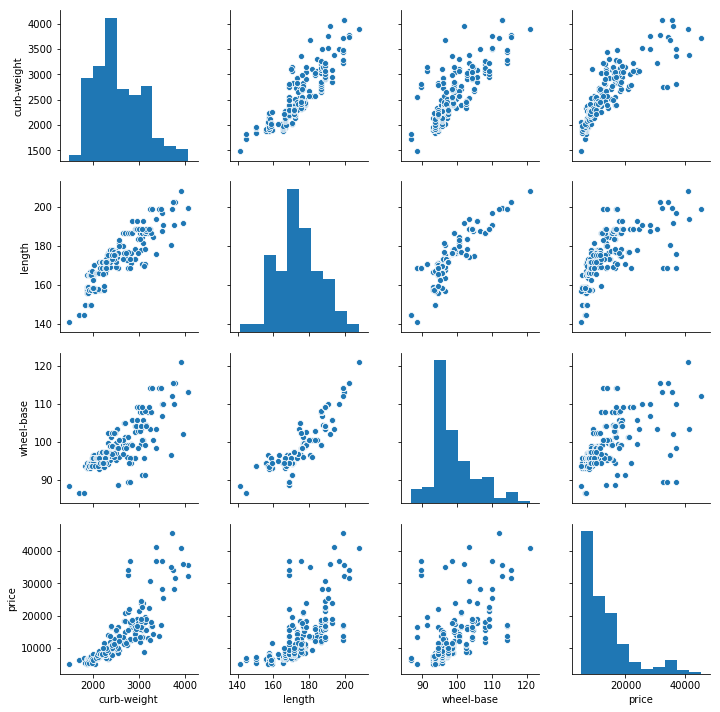

In [33]:
sns_plot = sns.pairplot(data[['curb-weight', 'length', 'wheel-base', 'priceV']]);


#### 6. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

t-критерий Стьюдента — общее название для класса методов статистической проверки гипотез (статистических критериев), основанных на распределении Стьюдента. Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках.

Данный критерий был разработан Уильямом Госсетом для оценки качества пива в компании Гиннесс. В связи с обязательствами перед компанией по неразглашению коммерческой тайны (руководство Гиннесса считало таковой использование статистического аппарата в своей работе), статья Госсета вышла в 1908 году в журнале «Биометрика» под псевдонимом «Student» (Студент).

На последней лекции определили, что t-test нельзя использовать для проверки взвимосвязи между переменными. Его используют для сравнения "средних" в разных выборках одной совокупности.

a) $H_0$ - средняя величина полей 'curb-weight' и 'length' - примерно одинаковая

In [61]:
#, 'wheel-base', 'priceV'
t, p = stats.ttest_ind(data['curb-weight'], data['length'])
print("t = " + str(t))
print("p = " + str(p))

t = 65.46928466718664
p = 1.554471031102583e-218


 p << 0.05 $H_0$ - отвергаем

b) $H_0$ - средняя цена на бензиновое и дизельное топливо - примерно одинаковая

In [69]:
t, p = stats.ttest_ind(data[data['fuel-type']=='gas']['price'], data[data['fuel-type']=='diesel']['price'])
print("t = " + str(t))
print("p = " + str(p))

t = -1.4715061487687495
p = 0.1427027883743746


 p > 0.05 и p > 0.1, значит не отвергаем $H_0$!